<a href="https://colab.research.google.com/github/renebttg/DataWarehouse_DataLake/blob/main/EXEMPLO_DATAWAREHOUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Define o número de produtos e atribui IDs, nomes e categorias aleatórias.
num_produtos = 600
produtos = {
    'produto_id' : range(1, num_produtos + 1),
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Cria um DataFrame para armazenar os detalhes dos produtos.
df_produtos = pd.DataFrame(produtos)

# Determina o número de vendas e gera um conjunto de dados com datas, IDs de produtos, quantidades e valores totais.
num_vendas = 1000  #
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),  #
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),  #
    'valor_total': np.random.randint(1000, 10000, num_vendas)  #
}

# Cria um DataFrame para armazenar os dados de vendas.
df_vendas = pd.DataFrame(data_vendas)

# Salva os DataFrames de vendas e produtos em arquivos CSV.
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Lê os dados dos arquivos CSV para verificar a integridade dos dados.
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Combina os DataFrames de vendas e produtos utilizando o 'produto_id' como chave.
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salva o resultado da combinação em um arquivo CSV, simulando um armazém de dados.
df_merge.to_csv('data_warehouse.csv', index=False)

# Lê e exibe os dados do armazém de dados para verificar o resultado final.
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Armazém de Dados:")
print(df_warehouse)

Conteúdo do Armazém de Dados:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-02         335         155         7991  Produto 335       Roupas
1    2024-04-18         166         157         7853  Produto 166       Roupas
2    2024-04-24         166         172         1063  Produto 166       Roupas
3    2024-04-03         166         105         3980  Produto 166       Roupas
4    2024-04-14         166         140         6801  Produto 166       Roupas
..          ...         ...         ...          ...          ...          ...
995  2024-04-20         208         121         9892  Produto 208  Eletrônicos
996  2024-04-30         549         129         2703  Produto 549       Roupas
997  2024-04-28         357         167         5382  Produto 357  Eletrônicos
998  2024-04-30         462         128         3547  Produto 462  Eletrônicos
999  2024-04-29         484          51         1432  Produto 484       Roupas

[1000 rows x 6 column


Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 10          125         7957
Produto 100         141         3098
Produto 101         197         6394
Produto 105         476        21657
Produto 106         248         9739
...                 ...          ...
Produto 94          354         9798
Produto 95           94         5220
Produto 96          254         6807
Produto 98          324        11657
Produto 99           53         5942

[483 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         42172      1900820
Eletrônicos       38042      1625318
Roupas            44033      1977708

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        5090       201510
2024-04-02        5013       214661
2024-04-03        3782       219194
2024-04-04        4

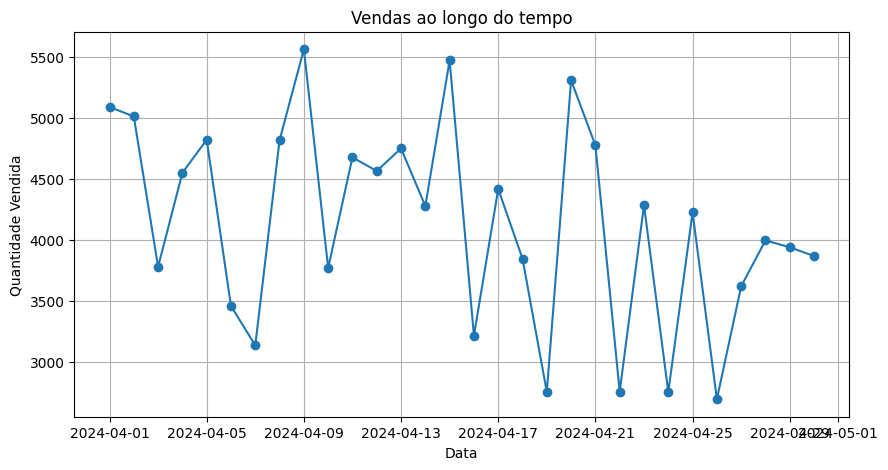


Análise de desempenho de produto
nome
Produto 10      7957
Produto 100     3098
Produto 101     6394
Produto 105    21657
Produto 106     9739
               ...  
Produto 94      9798
Produto 95      5220
Produto 96      6807
Produto 98     11657
Produto 99      5942
Name: valor_total, Length: 483, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega os dados do armazém de dados de um arquivo CSV
df_warehouse = pd.read_csv('data_warehouse.csv')

# Realiza uma análise de vendas por produto, agrupando os dados pelo nome do produto e calculando a soma das quantidades e valores totais de vendas
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por produto:")
print(vendas_por_produto)

# Realiza uma análise de vendas por categoria de produto, agrupando os dados pela categoria e calculando a soma das quantidades e valores totais de vendas
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Converte a coluna 'data' para o formato de data e hora e realiza uma análise de tendências temporais, agrupando os dados por data e calculando a soma das quantidades e valores totais de vendas
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)

# Plota um gráfico de linhas para visualizar a quantidade de vendas ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Realiza uma análise de desempenho de produto, agrupando os dados pelo nome do produto e calculando a soma do valor total das vendas
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produto")
print(desempenho_produto)